<a href="https://colab.research.google.com/github/kishpish/TEM-171-Protein-Binder_to_Simulation-Pipeline/blob/main/advanced_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 100000000})

In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR/view?usp=share_link
!unzip SMD_solution.zip
!mv SMD_solutions/* .

Downloading...
From (original): https://drive.google.com/uc?id=1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR
From (redirected): https://drive.google.com/uc?id=1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR&confirm=t&uuid=5707c35f-9ba6-4580-b0b7-988e4774b14b
To: /content/SMD_solutions.zip
100% 3.65G/3.65G [00:59<00:00, 61.0MB/s]
unzip:  cannot find or open SMD_solution.zip, SMD_solution.zip.zip or SMD_solution.zip.ZIP.
mv: cannot stat 'SMD_solutions/*': No such file or directory


##Installing GROMACS

In [ ]:
!apt install gromacs &> /dev/null

##Installing NGLview

In [ ]:
!pip install nglview  &> /dev/null
!pip install simpletraj  &> /dev/null
from google.colab import output
output.enable_custom_widget_manager()

##Clone files from GitHub

In [ ]:
!git clone https://github.com/lorenzopallante/BiomeccanicaMultiscala.git
!mv BiomeccanicaMultiscala/LAB/08-SMD/* .

Cloning into 'BiomeccanicaMultiscala'...
remote: Enumerating objects: 1642, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 1642 (delta 29), reused 17 (delta 10), pack-reused 1602 (from 2)
Receiving objects: 100% (1642/1642), 219.11 MiB | 53.69 MiB/s, done.
Resolving deltas: 100% (834/834), done.
Updating files: 100% (347/347), done.


##Installing gdown and downloading solutions

In [ ]:
!pip install gdown &> /dev/null
!gdown --fuzzy https://drive.google.com/file/d/1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR/view?usp=share_link
!unzip SMD_solution.zip
!mv SMD_solutions/* .

Downloading...
From (original): https://drive.google.com/uc?id=1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR
From (redirected): https://drive.google.com/uc?id=1hMlX-AJRQhrI8sgOJ-LAm6IiCXTetzUR&confirm=t&uuid=cf9c454d-bed7-405e-a03c-cefb6c725c3c
To: /content/SMD_solutions.zip
100% 3.65G/3.65G [00:12<00:00, 296MB/s]
unzip:  cannot find or open SMD_solution.zip, SMD_solution.zip.zip or SMD_solution.zip.ZIP.
mv: cannot stat 'SMD_solutions/*': No such file or directory


# Steered Molecular Dynamics (SMD)

## Theory of SMD

**Steered Molecular Dynamcis (SMD)** applies external steering forces, applying a **constraint** (e.g. a harmonic potential), that moves along a prescribed path in the configuration space in the right direction to accelerate processes that otherwise, due to energy barriers, are too slow, overtaking the limitation of the nanosecond time scale usual in classical molecular dynamics, which is seldom long enough to observe relevant processes.

In order to guarantee that the reaction coordinate closely follows the **constraint positions**, the force constant F must be sufficiently large, which is called the **stiff-spring approximation theory**:


$$
\begin{aligned}
& F(t)=2 k(v t-s(t)) \\
& W(x(t))=\int_0^{x(t)} F(t) d x(t)
\end{aligned}
$$

<center><img src="https://github.com/lorenzopallante/BiomeccanicaMultiscala/blob/main/LAB/08-SMD/imgs/SMD_scheme.png?raw=1" width="500"></center>

In a typical investigation of a molecular process, the **reaction path**, along which the process proceeds in the configurational space, is identified (or hypothesized) and the process progress is described by the **reaction coordinate**.

The **potential of mean force (PMF)** is basically the ***free energy profile along the reaction coordinate***. PMF is determined through the Boltzmann-weighted average over all degrees of freedom other than the reaction coordinate. ​

<center><img src="https://github.com/lorenzopallante/BiomeccanicaMultiscala/blob/main/LAB/08-SMD/imgs/PMF.png?raw=1" width="500"></center>

SMD simulations are non-equilibrium processes, but PMF is an equilibrium property. The **Jarzynski’s equality** ***connects equilibrium and non-equilibrium***

$$\left<e^{-\beta {W}}\right>=e^{-\beta \Delta G} \Longleftrightarrow \Delta G=-\frac{1}{\beta} \ln \left<e^{-\beta {W}}\right>$$


## Practical Session

A detailed tutorial on SMD was used, and available is in the first part of the Umbrella Sampling tutorial by Justin A. Lemkul, Ph.D.(http://www.mdtutorials.com/gmx/umbrella/index.html)

In [ ]:
import os
import sys

def upload_structure(file_path):
    if not os.path.isfile(file_path):
        print("File not found.")
        sys.exit(1)
    try:
        with open(file_path, "r") as f:
            structure = f.read()
            # Process the structure here
            print(f"Successfully uploaded file: {file_path}")
            print(f"Structure contents:\n{structure[:100]}...") # Truncate for brevity
    except Exception as e:
        print(f"Error processing the file: {e}")


if __name__ == "__main__":
  file_path = input("Enter the path to the PDB file: ")
  upload_structure(file_path)

Enter the path to the PDB file: /content/7qor_inhib_complex.pdb
Successfully uploaded file: /content/7qor_inhib_complex.pdb
Structure contents:
MODEL     1                                                                     
ATOM      1  N   SE...


In [ ]:
import nglview as nv
from IPython.display import display, IFrame

if 'returned_file_path' in locals() and returned_file_path: #Check if returned_file_path exists
    try:
        with open(returned_file_path, "r") as f:
            view = nv.show_file(f, ext='pdb')
        display(view)
    except Exception as e:
        print(f"Error displaying the file with nglview: {e}")
else:
    print("No file has been processed, please run the previous cell first and provide a file.")

No file has been processed, please run the previous cell first and provide a file.


The PDB contains 5 monomers (chains) arranged in a U-shaped way and interacting with non-bonded interactions.

## Prepare GMX Topology

create the protein topology..


In [ ]:
!echo -e "2 0 2 0 2 0 2 0 2 0" | gmx pdb2gmx -f data/2BEG_model1_capped.pdb -ignh -ff gromos53a6 -water spc -o complex.gro -ter

             :-) GROMACS - gmx pdb2gmx, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

##Generate Box

One must allow enough space in the pulling direction to allow for a continuous pull without interacting with the periodic images of the system.

That is, the **minimum image convention** must be continually satisfied, and as well, the pull distance must always be less than one-half the length of the box vector along which the pulling is being conducted.

This, if you have a 10-nm box, and you pull over a distance greater than 5.0 nm, the periodic distance becomes the reference distance for the pulling, and this distance is actually less than 5.0 nm!

This will be pulling a total distance of 5.0 nm in a 12.0-nm box, to avoid the complications described above. The center of mass of the protofibril will be placed at (3.280, 2.181, 2.4775) in a box of dimensions 6.560 x 4.362 x 12. Use editconf to place the protofibril at this location:

In [ ]:
!gmx editconf -f complex.gro -o newbox.gro -center 3.280 2.181 2.4775 -box 6.560 4.362 12

             :-) GROMACS - gmx editconf, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff           

## Step 4 - Add Water

In [ ]:
!gmx solvate -cp newbox.gro -cs spc216.gro -o solv.gro -p topol.top

             :-) GROMACS - gmx solvate, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

##Adding Ions

In [ ]:
!touch ions.mdp #create fake mdp to only create the ions.tpr
!gmx grompp -f ions.mdp -c solv.gro -p topol.top -o ions.tpr -maxwarn 10
!echo "SOL" | gmx genion -s ions.tpr -o solv_ions.gro -p topol.top -pname NA -nname CL -neutral -conc 0.1

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

##Energy Minimization

In [ ]:
!cat data/em.mdp

; ions.mdp - used as input into grompp to generate ions.tpr
; Parameters describing what to do, when to stop and what to save
integrator  = steep     ; Algorithm (steep = steepest descent minimization)
emtol       = 1000.0    ; Stop minimization when the maximum force < 1000.0 kJ/mol/nm
emstep      = 0.01      ; Energy step size
nsteps      = 50000     ; Maximum number of (minimization) steps to perform

; Parameters describing how to find the neighbors of each atom and how to calculate the interactions
nstlist         = 1         ; Frequency to update the neighbor list and long range forces
cutoff-scheme   = Verlet    ; Buffered neighbor searching
ns_type         = grid      ; Method to determine neighbor list (simple, grid)
rlist           = 1.4       ; Cut-off for making neighbor list (short range forces)
coulombtype     = PME       ; Treatment of long range electrostatic interactions
rcoulomb        = 1.4       ; Short-range electrostatic cut-off
rvdw            = 1.4       ; Short

Create the tpr and run the energy minimization:

In [ ]:
!mkdir -p 00-em/
!gmx grompp -f data/em.mdp -c solv_ions.gro -p topol.top -o 00-em/em.tpr -maxwarn 1
!gmx mdrun -v -deffnm 00-em/em

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

check if the potential reached the convergence:

In [ ]:
!echo "Potential" | gmx energy -f 00-em/em.edr -o 00-em/potential.xvg >/dev/null 2>&1

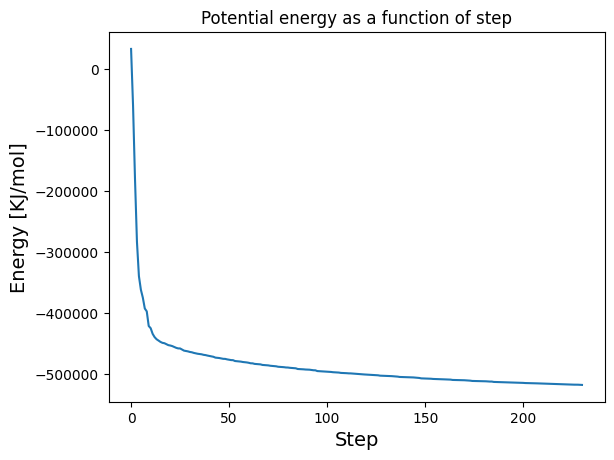

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data = np.loadtxt("00-em/potential.xvg",comments=["#","@"])
step = data[:,0] #assign the first column of data to the variable step
energy = data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Step",size=14) #assign the x label
plt.ylabel("Energy [KJ/mol]",size=14) #assign the y label
plt.title("Potential energy as a function of step"); #assign a title
#save the figure in png format with a resolution of 300 dot per inch "dpi"
plt.savefig("potential.png",format="png", dpi=300)

##NPT Equilibration with posre

In [ ]:
!mkdir -p 01-npt/
!gmx grompp -f data/npt.mdp -c 00-em/em.gro -p topol.top -r 00-em/em.gro -o 01-npt/npt.tpr -maxwarn 1
!gmx mdrun -deffnm 01-npt/npt -v

              :-) GROMACS - gmx grompp, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

check if the temperature and density reached the plateau:

In [ ]:
!echo -e "Temperature \n Density \n" | gmx energy -f 01-npt/npt.edr -o 01-npt/temp-dens.xvg

              :-) GROMACS - gmx energy, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            

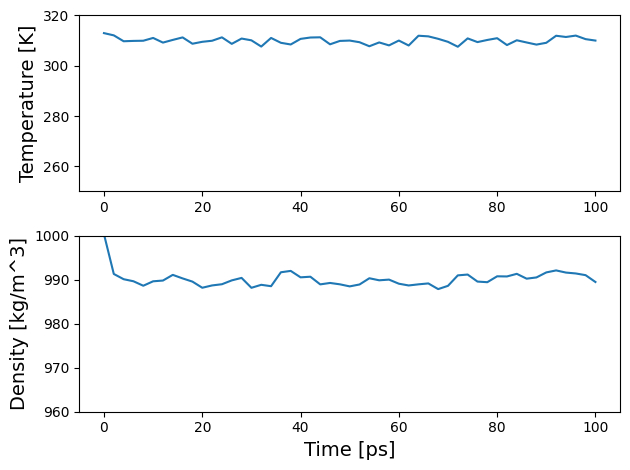

In [ ]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("01-npt/temp-dens.xvg",comments=["#","@"])
time=data[:,0] #assign the first column of data to the variable step
temp=data[:,1] #assign the second column of data to the variable potential
dens=data[:,2] #assign the second column of data to the variable potential

plot,axes=plt.subplots(2,1) #plot the function potential(data)
axes[0].plot(time,temp)
axes[1].plot(time,dens)
axes[1].set_xlabel("Time [ps]",size=14) #assign the x label
axes[0].set_ylabel("Temperature [K]",size=14) #assign the y label
axes[1].set_ylabel("Density [kg/m^3]",size=14) #assign the y label
axes[0].set_ylim(250,320)
axes[1].set_ylim(960,1000)
plt.tight_layout()
# if you want to save the figure, uncomment the following line
#plot.savefig("subplot_temp_dens.png",format="png", dpi=300)

##Steered Molecular Dynamics (SMD)

The idea is to pull one chain of the fibril away applying an external force while keeping fixed the position of the adjacent chain using position restraints.

<center><img src="https://github.com/lorenzopallante/BiomeccanicaMultiscala/blob/main/LAB/08-SMD/imgs/SystemScheme.png?raw=1" width="1200"></center>

We want to pull one of the chain of the amyloid fibril along a chosen **reaction coordinate**.

This is equivalent to ideally attach a **spring** with a certain **elastic constant** at the end of the fibril and then apply a displacemnt with a specific **force** and **velocity**.

For this example, the reaction coordinate is the **z-axis**. To generate these configurations, we must pull peptide A away from the protofibril. We will pull over the course of 500 ps of MD, saving snapshots every 1 ps.

The pulling options for the SMD are listed below:

<div class="alert alert-block alert-info">
; Pull code<br>
pull                    = yes<br>
pull_ncoords            = 1         ; only one reaction coordinate <br>
pull_ngroups            = 2         ; two groups defining one reaction coordinate <br>
pull_group1_name        = Chain_A<br>
pull_group2_name        = Chain_B<br>
pull_coord1_type        = umbrella  ; harmonic potential<br>
pull_coord1_geometry    = distance  ; simple distance increase<br>
pull_coord1_dim         = N N Y     ; pull along z<br>
pull_coord1_groups      = 1 2       ; groups 1 (Chain A) and 2 (Chain B) define the reaction coordinate<br>
pull_coord1_start       = yes       ; define initial COM distance > 0<br>
pull_coord1_rate        = 0.01      ; 0.01 nm per ps = 10 nm per ns<br>
pull_coord1_k           = 1000      ; kJ mol^-1 nm^-2<br>
</b></center><div>

In [ ]:
!gmx editconf -f 00-em/em.tpr -o 00-em/em.pdb >/dev/null 2>&1
!echo -e "chain A \n name 19 Chain_A \n chain B \n name 20 Chain_B \n q \n" | gmx make_ndx -f 00-em/em.pdb >/dev/null 2>&1

In [ ]:
!mkdir -p 02-pull
!gmx grompp -f data/pull.mdp -c 01-npt/npt.gro -p topol.top -r 01-npt/npt.gro -n index.ndx -t 01-npt/npt.cpt -o 02-pull/pull.tpr -maxwarn 2 >/dev/null 2>&1

In [ ]:
!gmx mdrun -deffnm 02-pull/pull -v

              :-) GROMACS - gmx mdrun, 2021.4-Ubuntu-2021.4-2 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            T

##trajectory using **VMD**!


In [ ]:
!echo "System System" | gmx trjconv -f 02-pull/pull.xtc -s 02-pull/pull.tpr -o 02-pull/noPBC.xtc -pbc mol -ur compact >/dev/null 2>&1
!gmx editconf -f 02-pull/pull.tpr -o 02-pull/noPBC.pdb >/dev/null 2>&1

In [ ]:
import nglview as nv
traj_nopbc = nv.SimpletrajTrajectory("02-pull/noPBC.xtc", "02-pull/pull.gro")
view_nopbc = nv.show_simpletraj(traj_nopbc)
#view_nopbc.add_representation("ball+stick",selection="water")
view_nopbc.center("sytem")
view_nopbc

NGLWidget(max_frame=500)

Force and displacement behaviour during the simulation:

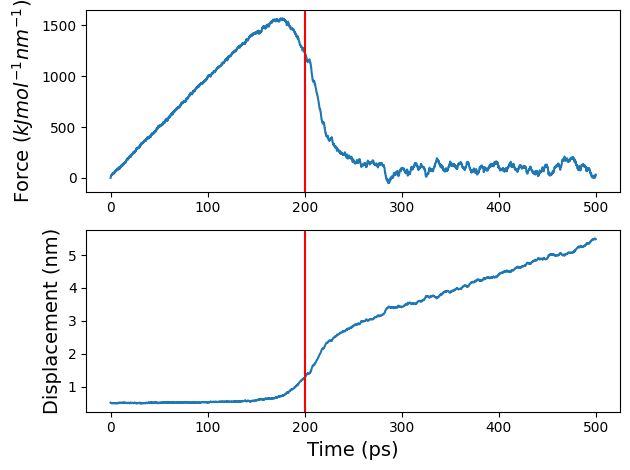

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#load data
data_f=np.loadtxt("02-pull/pull_pullf.xvg",comments=["#","@"])
data_d=np.loadtxt("02-pull/pull_pullx.xvg",comments=["#","@"])

# set variables for plot
time=data_f[:,0]
force=data_f[:,1]
displacement=data_d[:,1]

# plot with matplotlib
plot,axes=plt.subplots(2,1)
axes[0].plot(time,force)
axes[1].plot(time,displacement)
axes[1].set_xlabel("Time (ps)",size=14) #assign the x label
axes[0].set_ylabel("Force ($kJmol^{-1}nm^{-1}$)",size=14) #assign the y label
axes[1].set_ylabel("Displacement (nm)",size=14) #assign the y label
axes[0].axvline(x = 200, color = 'r', label = 'detach')
axes[1].axvline(x = 200, color = 'r', label = 'detach')
plt.tight_layout()
# if you want to save the figure, uncomment the following line
#plot.savefig("subplot_force_disp.png",format="png", dpi=300)

Usually we are interested in the force-displacemnt graph, which allow you to estimate some mechanical properties of the system.

**Plot the force-displacement graph using matplotlib.**

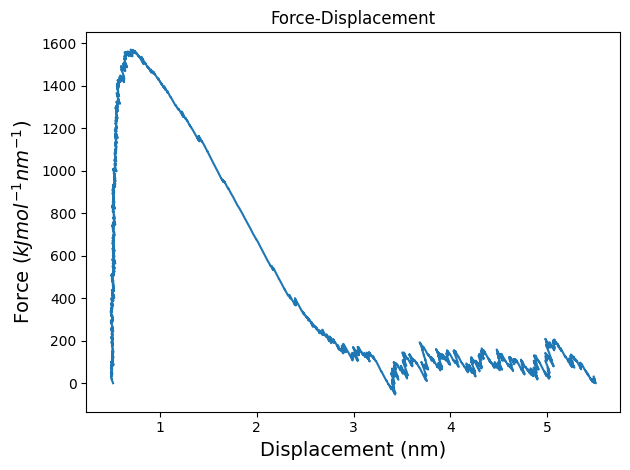

In [ ]:
plt.plot(displacement,force)
plt.xlabel("Displacement (nm)",size=14)
plt.ylabel("Force ($kJmol^{-1}nm^{-1}$)",size=14)
plt.title("Force-Displacement")
plt.tight_layout()
# uncomment the following line to save the figure
#plt.savefig("force-displacement.png",format="png", dpi=300)

How can we compute the work done by the pulling force?

We are also interested in evaluating the energy difference $\Delta G$ between state A (bound state) and state B (un-bound state).

Remember the **Jarzinski equality**:

$$\left<e^{-\beta {W}}\right>=e^{-\beta \Delta G} \Longleftrightarrow \Delta G=-\frac{1}{\beta} \ln \left<e^{-\beta {W}}\right>$$


We can extract **equilibrium information ΔG** from the ensemble of **non-equilibrium (finite-time) measurements**.


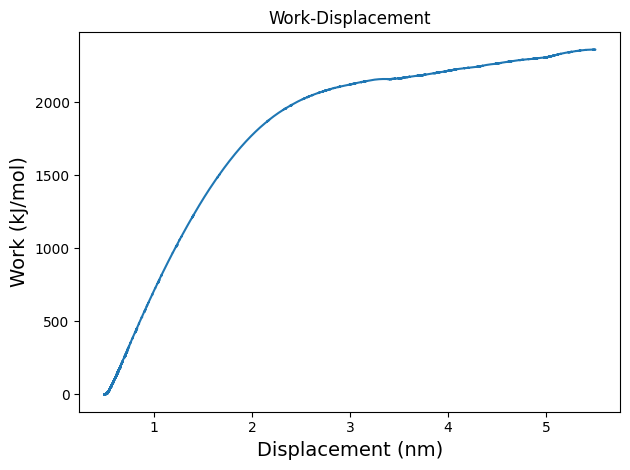

In [ ]:
# evaluate work done by the force
import numpy as np

work =  []
for i in displacement:
    # calculate work
    work.append(np.trapz(force[displacement<=i],displacement[displacement<=i]))
# convert to numpy array
work = np.array(work)

# calculate the free energy
temperature = 300 # K
boltzmann = 8.314 # J/mol/K
beta = 1/(boltzmann*temperature)
free_energy = -1/beta*np.log(np.exp(-beta*work))

plt.plot(displacement,work)
plt.xlabel("Displacement (nm)",size=14)
plt.ylabel("Work (kJ/mol)",size=14)
plt.title("Work-Displacement")
plt.tight_layout()
# uncomment the following line to save the figure
#plt.savefig("work-displacement.png",format="png", dpi=300)

In [ ]:
# print the results
print(f"Total work done by the force {work[-1]:.2f} kJ/mol")
print(f"ΔG = {free_energy[-1]:.2f} kJ/mol")

Total work done by the force 2360.91 kJ/mol
ΔG = 2360.91 kJ/mol


Note that in this case the free energy is equal to the work done since we only perform a single simulation.

## Additional Materials

In [ ]:
!pip install --upgrade gdown

In [ ]:
%%bash
mkdir -p 03-multiple_pull
cd 03-multiple_pull
# Downloading individual files instead of folders
gdown https://drive.google.com/file/d/1-jE5i8oajy5Z3mJy0V55W0L7n7_N0aZq/view?usp=share_link # Replace with the actual file ID for each file
# Repeat the above line for each file within the folders, replacing the file ID accordingly.
# Example for the next file:
# gdown https://drive.google.com/file/d/1-kF6j9pabxyz78W9U0A1B2C3D4E5f6G7/view?usp=share_link
# ... and so on for all the files you need

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-jE5i8oajy5Z3mJy0V55W0L7n7_N0aZq
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-jE5i8oajy5Z3mJy0V55W0L7n7_N0aZq/view?usp=share_link
To: /content/03-multiple_pull/view?usp=share_link
3.06kB [00:00, 8.95MB/s]


In [ ]:
%%bash
mkdir -p 03-multiple_pull
cd 03-multiple_pull

In [ ]:
!gdown https://drive.google.com/file/d/1-kF6j9pabxyz78W9U0A1B2C3D4E5f6G7/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-kF6j9pabxyz78W9U0A1B2C3D4E5f6G7
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-kF6j9pabxyz78W9U0A1B2C3D4E5f6G7/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 8.52MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-lG7k0qcbxyz78W9U0A1B2C3D4E5f6G8/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-lG7k0qcbxyz78W9U0A1B2C3D4E5f6G8
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-lG7k0qcbxyz78W9U0A1B2C3D4E5f6G8/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 8.36MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-mI8l1rcdxyz78W9U0A1B2C3D4E5f6G9/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-mI8l1rcdxyz78W9U0A1B2C3D4E5f6G9
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-mI8l1rcdxyz78W9U0A1B2C3D4E5f6G9/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 8.91MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-nJ9m2sdexyz78W9U0A1B2C3D4E5f6H0/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-nJ9m2sdexyz78W9U0A1B2C3D4E5f6H0
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-nJ9m2sdexyz78W9U0A1B2C3D4E5f6H0/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 10.9MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-oK0n3tfexyz78W9U0A1B2C3D4E5f6H1/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-oK0n3tfexyz78W9U0A1B2C3D4E5f6H1
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-oK0n3tfexyz78W9U0A1B2C3D4E5f6H1/view?usp=share_link
To: /content/view?usp=share_link
3.04kB [00:00, 118kB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-pL1o4ugfxyz78W9U0A1B2C3D4E5f6H2/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-pL1o4ugfxyz78W9U0A1B2C3D4E5f6H2
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-pL1o4ugfxyz78W9U0A1B2C3D4E5f6H2/view?usp=share_link
To: /content/view?usp=share_link
3.04kB [00:00, 21.3kB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-qJ2p5vhgxyz78W9U0A1B2C3D4E5f6H3/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-qJ2p5vhgxyz78W9U0A1B2C3D4E5f6H3
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-qJ2p5vhgxyz78W9U0A1B2C3D4E5f6H3/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 7.61MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-rK3q6wihxyz78W9U0A1B2C3D4E5f6H4/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-rK3q6wihxyz78W9U0A1B2C3D4E5f6H4
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-rK3q6wihxyz78W9U0A1B2C3D4E5f6H4/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 8.94MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-sL4r7xjihxyz78W9U0A1B2C3D4E5f6H5/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-sL4r7xjihxyz78W9U0A1B2C3D4E5f6H5
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-sL4r7xjihxyz78W9U0A1B2C3D4E5f6H5/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 9.00MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-tM5s8ykjhxyz78W9U0A1B2C3D4E5f6H6/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-tM5s8ykjhxyz78W9U0A1B2C3D4E5f6H6
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-tM5s8ykjhxyz78W9U0A1B2C3D4E5f6H6/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 8.89MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-uL6t9zlkhxyz78W9U0A1B2C3D4E5f6H7/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-uL6t9zlkhxyz78W9U0A1B2C3D4E5f6H7
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-uL6t9zlkhxyz78W9U0A1B2C3D4E5f6H7/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 11.2MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-vM7u0amkhxyz78W9U0A1B2C3D4E5f6H8/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-vM7u0amkhxyz78W9U0A1B2C3D4E5f6H8
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-vM7u0amkhxyz78W9U0A1B2C3D4E5f6H8/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 10.2MB/s]


In [ ]:
!gdown https://drive.google.com/file/d/1-wN8v1bnkhxyz78W9U0A1B2C3D4E5f6H9/view?usp=share_link

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-wN8v1bnkhxyz78W9U0A1B2C3D4E5f6H9
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-wN8v1bnkhxyz78W9U0A1B2C3D4E5f6H9/view?usp=share_link
To: /content/view?usp=share_link
3.06kB [00:00, 9.03MB/s]


In [ ]:
!pip install --upgrade gdown
import os

def get_file_ids_and_gdown_commands(folder_urls):
  """
  Gets file IDs and creates gdown commands for all files in Google Drive folders.

  Args:
    folder_urls: A list of Google Drive folder URLs.

  Returns:
    A dictionary mapping folder URLs to a list of gdown commands for each file.
  """

  gdown_commands = {}
  for folder_url in folder_urls:
    # Get the folder ID from the URL
    folder_id = folder_url.split('/')[-2]  # Extract ID from the URL
    # Create a gdown command to list files (using --list option)
    list_command = f"gdown --list --id {folder_id} --fuzzy"
    # Run the command and capture the output (includes file IDs)
    output = os.popen(list_command).read()
    # Split the output into lines, ignoring the header
    file_ids = output.strip().split('\n')[1:]
    commands = []
    for file_id in file_ids:
      # Extract file ID from output
      file_id = file_id.split()[0]
      # Construct a gdown download command
      gdown_command = f"!gdown https://drive.google.com/uc?id={file_id}"
      commands.append(gdown_command)
    gdown_commands[folder_url] = commands
  return gdown_commands

# Your 10 Google Drive folder URLs
folder_urls = [
    "https://drive.google.com/drive/folders/1i4KyCZB0a3Ln1SKuXcl2GXj4zceP_09U?usp=share_link",
    "https://drive.google.com/drive/folders/1_9jm4lhWop8Revp49FiIgVy3EfT0gSCX?usp=share_link",
    "https://drive.google.com/drive/folders/1zmtdbKhV4SHCTj6-AQcUc8PnArfs_rfT?usp=share_link",
    "https://drive.google.com/drive/folders/1GXMMNymYGyhGWMdQAmGS2DBn1_CpkP7J?usp=share_link",
    "https://drive.google.com/drive/folders/1_6M3w9sArjt5XlXUVmpNsNBMgRtPnn2p?usp=share_link",
    "https://drive.google.com/drive/folders/1CO6LLYJl40MRJXamJRAP5OOub-6aJCwo?usp=share_link",
    "https://drive.google.com/drive/folders/1zIatq9nV6AF6Pxvlv2n9MjXYqQRWrcQJ?usp=share_link",
    "https://drive.google.com/drive/folders/16z8IEFCSKDjkt8qXbtLL3I8g-Z1cgO_T?usp=share_link",
    "https://drive.google.com/drive/folders/1d6q8IqwDuBVmDKS2ku58NKSdukz_Xwk8?usp=share_link",
    "https://drive.google.com/drive/folders/1mceU53iFBvyMljxUVl-PTJBuwEr4wnvr?usp=share_link",
]

# Get the commands
commands_by_folder = get_file_ids_and_gdown_commands(folder_urls)

# Print the commands (or you can execute them directly)
for folder_url, commands in commands_by_folder.items():
  print(f"Commands for folder: {folder_url}")
  for command in commands:
    print(command)
  print("-" * 20)

Commands for folder: https://drive.google.com/drive/folders/1i4KyCZB0a3Ln1SKuXcl2GXj4zceP_09U?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1_9jm4lhWop8Revp49FiIgVy3EfT0gSCX?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1zmtdbKhV4SHCTj6-AQcUc8PnArfs_rfT?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1GXMMNymYGyhGWMdQAmGS2DBn1_CpkP7J?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1_6M3w9sArjt5XlXUVmpNsNBMgRtPnn2p?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1CO6LLYJl40MRJXamJRAP5OOub-6aJCwo?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/1zIatq9nV6AF6Pxvlv2n9MjXYqQRWrcQJ?usp=share_link
--------------------
Commands for folder: https://drive.google.com/drive/folders/16z8IEFCSKDjkt8qXbtLL3I8g-Z1cg

In [ ]:
%%bash
mkdir -p 03-multiple_pull
cd 03-multiple_pull
gdown --folder https://drive.google.com/drive/folders/1i4KyCZB0a3Ln1SKuXcl2GXj4zceP_09U?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1_9jm4lhWop8Revp49FiIgVy3EfT0gSCX?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1zmtdbKhV4SHCTj6-AQcUc8PnArfs_rfT?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1GXMMNymYGyhGWMdQAmGS2DBn1_CpkP7J?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1_6M3w9sArjt5XlXUVmpNsNBMgRtPnn2p?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1CO6LLYJl40MRJXamJRAP5OOub-6aJCwo?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1zIatq9nV6AF6Pxvlv2n9MjXYqQRWrcQJ?usp=share_link
gdown --folder https://drive.google.com/drive/folders/16z8IEFCSKDjkt8qXbtLL3I8g-Z1cgO_T?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1d6q8IqwDuBVmDKS2ku58NKSdukz_Xwk8?usp=share_link
gdown --folder https://drive.google.com/drive/folders/1mceU53iFBvyMljxUVl-PTJBuwEr4wnvr?usp=share_link

Processing file 1kYiT5XXEaZkvZqhqW_CPlgnSjzVg2p3f energy.xvg
Processing file 1fqnsdYJK1-ZX6zaat8JusIir7b0Wyvqj npt_run.out
Processing file 1SnNCa8A0O2bP8CsmzK8GjpKXuCcvLs2H npt.cpt
Processing file 1x6XgxwP4QQz1fGh8gTWBq4bH3Az7kJ-F npt.edr
Processing file 1a41MWhAk57Q8XhwvSMJ1rPhmr1iHB_1G npt.gro
Processing file 1IKga6opABGgydmEOSNFAGyk-YNKOGd_j npt.log
Processing file 1mNk830wH0xSaIq7kBr6JxkeZDOmVB17d npt.tpr
Processing file 1uw1G8Hl_hMbUfnqnYK-ktC5N2DtaG2C2 npt.trr
Processing file 1HoBV37x5qdgj-3BJykPq4giZ-5WlHoDi pull_pullf.xvg
Processing file 1zJmqUr_qF7LkYOPzsH91IGMDWr0RGqpT pull_pullx.xvg
Processing file 1LwYrh8ho053SYUe2TYPUDEKDqvd84du3 pull_run.out
Processing file 1h3gZKl7hP9xUPrh98i_swPMnYQYEpFtw pull.cpt
Processing file 1LBQkp5RGky8infkHD-uNurU-N9PtHHbV pull.edr
Processing file 1UTNEKdR6GyTQoYl0jQKq8SVeQayK0mBx pull.gro
Processing file 1l6w1ug0TvPNWwhL5z-sj4qK-qptQeNjZ pull.log
Processing file 1oQr7tJFXvB5TuZD36lZrwK_8Kt5e7o8Z pull.tpr
Processing file 1VWjS-s-BI_HelRdjoKt4vKhC

Retrieving folder contents
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1kYiT5XXEaZkvZqhqW_CPlgnSjzVg2p3f
To: /content/03-multiple_pull/pull_1/energy.xvg
100%|██████████| 13.2k/13.2k [00:00<00:00, 48.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1fqnsdYJK1-ZX6zaat8JusIir7b0Wyvqj
From (redirected): https://drive.google.com/uc?id=1fqnsdYJK1-ZX6zaat8JusIir7b0Wyvqj&confirm=t&uuid=da3375f2-6db8-40e9-a22c-dddd13bfbebe
To: /content/03-multiple_pull/pull_1/npt_run.out
100%|██████████| 31.5k/31.5k [00:00<00:00, 85.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SnNCa8A0O2bP8CsmzK8GjpKXuCcvLs2H
To: /content/03-multiple_pull/pull_1/npt.cpt
100%|██████████| 799k/799k [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.com/uc?id=1x6XgxwP4QQz1fGh8gTWBq4bH3Az7kJ-F
To: /content/03-multiple_pull/pull_1/npt.edr
100%|██████████| 33.8k/33.8k [00:0

CalledProcessError: Command 'b'mkdir -p 03-multiple_pull\ncd 03-multiple_pull\ngdown --folder https://drive.google.com/drive/folders/1i4KyCZB0a3Ln1SKuXcl2GXj4zceP_09U?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1_9jm4lhWop8Revp49FiIgVy3EfT0gSCX?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1zmtdbKhV4SHCTj6-AQcUc8PnArfs_rfT?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1GXMMNymYGyhGWMdQAmGS2DBn1_CpkP7J?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1_6M3w9sArjt5XlXUVmpNsNBMgRtPnn2p?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1CO6LLYJl40MRJXamJRAP5OOub-6aJCwo?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1zIatq9nV6AF6Pxvlv2n9MjXYqQRWrcQJ?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/16z8IEFCSKDjkt8qXbtLL3I8g-Z1cgO_T?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1d6q8IqwDuBVmDKS2ku58NKSdukz_Xwk8?usp=share_link\ngdown --folder https://drive.google.com/drive/folders/1mceU53iFBvyMljxUVl-PTJBuwEr4wnvr?usp=share_link\n'' returned non-zero exit status 1.

In [ ]:
!pip install --upgrade gdown
import os

# Your output string (paste the full output here)
output_string = """
Processing file 1eDigtI6e-r6NscRPs1UqAAAcMB6eX6E9 npt.edr
Processing file 1XgNzXAnLIAJpGq_1hSyct64DwvCqFRFQ npt.gro
Processing file 17PhuJJJYvGbhfkwcKDH1hwaS2lEEgT0n npt.log
Processing file 1Ques8FUMTMQRpgPxSs0sFbo-wZnII_kB npt.tpr
Processing file 1zrJeVUNTs-RsCelshyv89nGWNOKCyUlG npt.trr
Processing file 1XudvMfkv9Lq1DHPOSle_FDpdGCBJb9Yl pull_pullf.xvg
Processing file 1SHTMjM5IlzBOc849KIddZWrlxc5QAMaB pull_pullx.xvg
Processing file 1mE6WH2XJ9TzG93I323TcnxcF3S204lmB pull_run.out
Processing file 1LRAF5zy0G77DU8rKjhxD-BD4ZF5pE0QD pull.cpt
Processing file 18CnMFq2zxPbYwkZCqWHyv3q2IqyD8k-n pull.edr
Processing file 1x1x6oSNfWbna9dtEeUXeOzEYc5R5-8Zg pull.gro
Processing file 1LgYvWqzPPRENCm9Srsunl6ZGlNnEEqsg pull.log
Processing file 1ne6qOl-U2gsoGw_Xk-eK1Stk-qH21kkE pull.tpr
Processing file 1J0Qyp0DlVRjZ8bzsoRONrFyv7IDL_Kt1 pull.trr
Processing file 1Y32udqp1n0cSnNjArXnJH4rJ-M1A49oj pull.xtc
Processing file 1hADUPCObtipWtdMZcpVXewAZ_fyqIoZt npt_run.out
... (rest of your output) ...
"""

gdown_commands = []
for line in output_string.strip().split('\n'):
    parts = line.split()
    if len(parts) >= 3 and parts[0] == "Processing" and parts[1] == "file":
        file_id = parts[2]
        file_name = parts[3]  # Get the file name
        gdown_command = f"!gdown https://drive.google.com/uc?id={file_id} -O {file_name}"  # Include -O to specify file name
        gdown_commands.append(gdown_command)

# Print or execute the commands
for command in gdown_commands:
    print(command)
    # You can uncomment the next line to execute the commands directly
    # os.system(command[1:])  # Remove the '!' before executing

!gdown https://drive.google.com/uc?id=1eDigtI6e-r6NscRPs1UqAAAcMB6eX6E9 -O npt.edr
!gdown https://drive.google.com/uc?id=1XgNzXAnLIAJpGq_1hSyct64DwvCqFRFQ -O npt.gro
!gdown https://drive.google.com/uc?id=17PhuJJJYvGbhfkwcKDH1hwaS2lEEgT0n -O npt.log
!gdown https://drive.google.com/uc?id=1Ques8FUMTMQRpgPxSs0sFbo-wZnII_kB -O npt.tpr
!gdown https://drive.google.com/uc?id=1zrJeVUNTs-RsCelshyv89nGWNOKCyUlG -O npt.trr
!gdown https://drive.google.com/uc?id=1XudvMfkv9Lq1DHPOSle_FDpdGCBJb9Yl -O pull_pullf.xvg
!gdown https://drive.google.com/uc?id=1SHTMjM5IlzBOc849KIddZWrlxc5QAMaB -O pull_pullx.xvg
!gdown https://drive.google.com/uc?id=1mE6WH2XJ9TzG93I323TcnxcF3S204lmB -O pull_run.out
!gdown https://drive.google.com/uc?id=1LRAF5zy0G77DU8rKjhxD-BD4ZF5pE0QD -O pull.cpt
!gdown https://drive.google.com/uc?id=18CnMFq2zxPbYwkZCqWHyv3q2IqyD8k-n -O pull.edr
!gdown https://drive.google.com/uc?id=1x1x6oSNfWbna9dtEeUXeOzEYc5R5-8Zg -O pull.gro
!gdown https://drive.google.com/uc?id=1LgYvWqzPPRENCm9Srsunl6ZGlN

If you want to properly perform a SMD simulation using multiple simulation replicas to properly evaluate the free energy difference with Jarzynski, you should do something like that:

In [ ]:
# create a new directory for pulling multiple times
!mkdir -p 03-multiple_pull

In [ ]:
%%bash
for i in {1..10}
do
    # create the directory for the i-esim SMD simulation
    mkdir -p 03-multiple_pull/pull_$i

    # create equilibration tpr and run equilibration
    # each replica has a different velocity distribution (gen-vel=yes in the npt.mdp file)
    gmx grompp -f data/npt.mdp -c 00-em/em.gro -p topol.top -r 00-em/em.gro -o 03-multiple_pull/pull_$i/npt.tpr -maxwarn 2 >/dev/null 2>&1
    gmx mdrun -deffnm 03-multiple_pull/pull_$i/npt -v >03-multiple_pull/pull_$i/npt_run.out 2>&1

    # run the SMD simulation
    gmx grompp -f data/pull.mdp -c 03-multiple_pull/pull_$i/npt.gro -p topol.top -r 03-multiple_pull/pull_$i/npt.gro -n index.ndx -t 03-multiple_pull/pull_$i/npt.cpt -o 03-multiple_pull/pull_$i/pull.tpr -maxwarn 2 >/dev/null 2>&1
    gmx mdrun -deffnm 03-multiple_pull/pull_$i/pull -v >03-multiple_pull/pull_$i/pull_run.out 2>&1

done

Process is terminated.


FileNotFoundError: 03-multiple_pull/pull_6/pull_pullf.xvg not found.

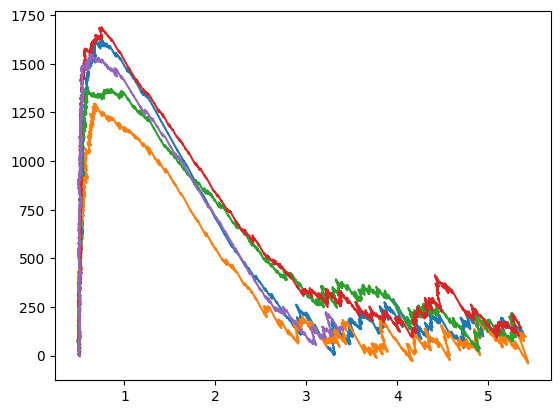

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#load data
data_f = []
data_d = []
forces = []
displacements = []

# create figure for plot
fig,ax = plt.subplots(1,1)

# load data for each simulation
for i in range(1,11):

    # load data
    data_f = np.loadtxt("03-multiple_pull/pull_" + str(i) + "/pull_pullf.xvg",comments=["#","@"])
    data_d = np.loadtxt("03-multiple_pull/pull_" + str(i) + "/pull_pullx.xvg",comments=["#","@"])

    # retrieve data
    time=data_f[:,0]
    force = data_f[:,1]
    displacement = data_d[:,1]

    # append data to lists
    forces.append(force)
    displacements.append(displacement)

    # plot with matplotlib
    plt.plot(displacement,force)

# convert to numpy arrays
forces = np.array(forces)
displacements = np.array(displacements)

plt.xlabel("Displacement (nm)",size=14)
plt.ylabel("Force ($kJmol^{-1}nm^{-1}$)",size=14)
plt.title("Force-Displacement")
plt.tight_layout()

IndexError: list index out of range

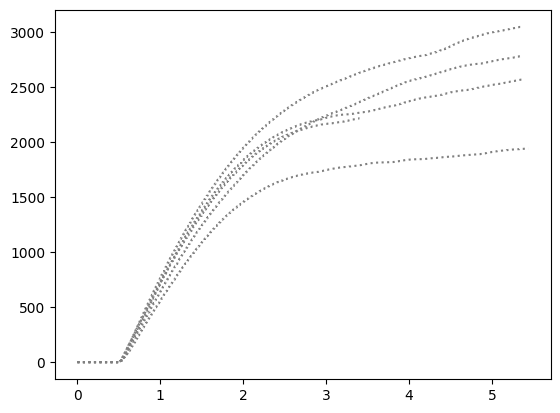

In [ ]:
temperature = 300  # K
boltzmann = 8.314  # J/mol/K
# boltzmann = 0.008314  # kJ/mol/K
beta = 1 / (boltzmann * temperature)

works = []
boltzmann_fac = []

# Find maximum length of displacement arrays
max_len = max(len(d) for d in displacements)

# cycle of simulations
for sim in range(1, 11):

    displacement = displacements[sim - 1]
    force = forces[sim - 1]

    # Pad shorter arrays with zeros to match maximum length
    displacement = np.pad(displacement, (0, max_len - len(displacement)), 'constant', constant_values=displacement[-1])
    force = np.pad(force, (0, max_len - len(force)), 'constant', constant_values=force[-1])


    xax = np.arange(0, np.max(displacement), np.max(displacement) / len(displacement)) # Use len(displacement) instead of displacement.shape[1]
    # xax = np.arange(0, 4, 4/displacements.shape[1])

    work = []

    for i in xax:

        # calculate work
        work.append(np.trapz(force[displacement <= i], displacement[displacement <= i]))

    work = np.array(work)

    works.append(work)
    boltzmann_fac.append(np.exp(-beta * work))

    plt.plot(xax, work, color="gray", ls='dotted')

# calculate the free energy
mean_boltz_fac = np.mean(np.array(boltzmann_fac), axis=0)

# calculate the free energy
delta_g = -1 / beta * np.log(mean_boltz_fac)
plt.plot(xax, delta_g, color="red", ls='solid', label="PMF")
plt.xlabel("Displacment ($nm$)")
plt.ylabel("Energy $kJ*mol^{-1}$")
plt.legend()
plt.tight_layout()

In [ ]:
!pip install mdtraj
import nglview as nv
import mdtraj as md

# Load the trajectory and topology
traj = md.load("02-pull/pull.xtc", top="02-pull/pull.gro")

# Create NGLView widget
view = nv.show_mdtraj(traj)

# Representations
view.add_representation("cartoon", selection="protein", color="blue")
view.add_representation("licorice", selection="water", color="red", opacity=0.5)
view.add_representation("ball+stick", selection="Chain_A", color="orange")

# Center the view
view.center()

# Access the trajectory and control animation using the control panel
# view.trajectory.player.start()  # start animation (play)
# view.trajectory.player.pause() # pause animation
# view.trajectory.player.stop()  # stop animation

# Display the widget
view

NGLWidget(max_frame=500)

In [ ]:
# Download Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh

# Make it executable
!chmod +x Miniconda3-latest-Linux-x86_64.sh

# Install Miniconda to a specific location (e.g., /usr/local)
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /usr/local

# Update PATH (important for using conda)
import sys
sys.path.append('/usr/local/lib/python3.11/site-packages')

# Install openmmtools
!conda install -c conda-forge openmmtools -y

--2025-01-20 04:14:28--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147784736 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 140.94M   210MB/s    in 0.7s    

2025-01-20 04:14:29 (210 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [147784736/147784736]

ERROR: File or directory already exists: '/usr/local'
If you want to update an existing installation, use the -u option.
/bin/bash: line 1: conda: command not found


In [ ]:
!pip install mdtraj
!pip install openmmtools
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()
!conda install -c conda-forge openmmtools -y
# Import libraries
import mdtraj as md
import nglview as nv

# System creation (deca-alanine)
from openmmtools import testsystems
ala10 = testsystems.AlanineDipeptideVacuum()
ala10.system = ala10.system  # for Amber implicit solvent

# Simulation setup
from simtk import openmm, unit
from openmmtools.integrators import LangevinIntegrator
temperature = 300 * unit.kelvin
friction = 1 / unit.picosecond
timestep = 2 * unit.femtoseconds
integrator = LangevinIntegrator(temperature, friction, timestep)

# Create simulation context
simulation = openmm.app.Simulation(ala10.topology, ala10.system, integrator)
simulation.context.setPositions(ala10.positions)

# SMD setup (pulling along x-axis)
from openmmtools.forces import SMDForce
spring_constant = 10.0 * unit.kilocalories_per_mole / unit.angstroms**2
group1 = 1 # Atom index of one end of the peptide
group2 = 10 # Atom index of the other end of the peptide
target_distance = 2.0 * unit.nanometers # Target distance to stretch
pull_rate = 0.01 * unit.nanometers / unit.picoseconds # Pulling speed

smd_force = SMDForce(group1, group2, spring_constant, target_distance, pull_rate)
simulation.system.addForce(smd_force)

# Simulation run
simulation.reporters.append(openmm.app.DCDReporter('smd_trajectory.dcd', 100)) # Save trajectory
simulation.reporters.append(openmm.app.StateDataReporter(sys.stdout, 100, step=True, potentialEnergy=True, temperature=True)) # Print simulation progress
simulation.step(10000) # Run for 10000 steps (20 ps)

# Load trajectory for visualization
traj = md.load('smd_trajectory.dcd', top=ala10.topology)
view = nv.show_mdtraj(traj)
view

ERROR: Could not find a version that satisfies the requirement openmmtools (from versions: none)
ERROR: No matching distribution found for openmmtools


Miniconda is subject to terms of service: https://legal.anaconda.com/policies/en/#terms-of-service


⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py311_24.11.1-0-Linux-x86_64.sh...


AssertionError: 💥💔💥 Checksum failed! Expected 35a58b8961e1187e7311b979968662c6223e86e1451191bed2e67a72b6bd0658, got 807774bae6cd87132094458217ebf713df436f64779faf9bb4c3d4b6615c1e3a

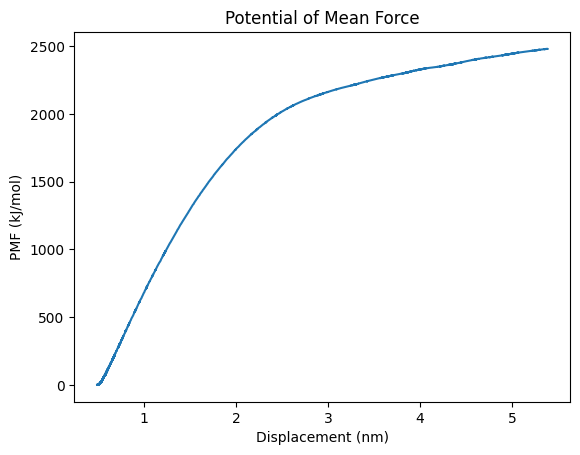

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the following data from your SMD simulations:
# - displacements: A list or array of displacement values (reaction coordinate)
# - forces: A list or array of corresponding force values

# Parameters
temperature = 300  # K
boltzmann_constant = 8.314  # J/mol/K
beta = 1 / (boltzmann_constant * temperature)

# Calculate work done for each simulation
works = []
for i in range(len(displacements)):
    work = np.trapz(forces[i], displacements[i])  # Integrate force over displacement
    works.append(work)

# Ensure work values are a NumPy array
works = np.array(works)

# Calculate PMF at each displacement
pmf = []
for disp in displacements[0]:  # Assuming displacements are the same for all simulations
    work_at_disp = []
    for i in range(len(displacements)):
        indices = displacements[i] <= disp
        work_at_disp.append(np.trapz(forces[i][indices], displacements[i][indices]))

    work_at_disp = np.array(work_at_disp)
    pmf_at_disp = -1/beta * np.log(np.mean(np.exp(-beta * work_at_disp)))
    pmf.append(pmf_at_disp)

# Plot the PMF
plt.plot(displacements[0], pmf)
plt.xlabel("Displacement (nm)")
plt.ylabel("PMF (kJ/mol)")
plt.title("Potential of Mean Force")
plt.show()

In [ ]:
!pip install wham

import numpy as np
import matplotlib.pyplot as plt
from wham import WHAM

# Assuming you have a list of displacement and force data from multiple SMD simulations:
# displacements = [displacement_data_sim1, displacement_data_sim2, ...]
# forces = [force_data_sim1, force_data_sim2, ...]
# where displacement_data_sim1, force_data_sim1 are numpy arrays for simulation 1, and so on.

# Parameters
temperature = 300  # K
boltzmann_constant = 8.314  # J/mol/K
beta = 1 / (boltzmann_constant * temperature)

# Combine displacement and force data
data = [np.stack((displacements[i], forces[i]), axis=1) for i in range(len(displacements))]

# Create WHAM object
wham_obj = WHAM(data, beta)

# Calculate PMF
pmf, bin_centers = wham_obj.compute_pmf()

# Plot PMF
plt.plot(bin_centers, pmf)
plt.xlabel("Displacement (nm)")
plt.ylabel("PMF (kJ/mol)")
plt.title("Potential of Mean Force (WHAM)")
plt.show()

ImportError: cannot import name 'WHAM' from 'wham' (/usr/local/lib/python3.11/dist-packages/wham/__init__.py)

In [ ]:
!pip install git+https://github.com/apallath/WHAM.git#egg=WHAM

  Cloning https://github.com/apallath/WHAM.git to /tmp/pip-install-ehk3ihen/wham_712670f3e6ad4723acb3764206a7bda3
  Running command git clone --filter=blob:none --quiet https://github.com/apallath/WHAM.git /tmp/pip-install-ehk3ihen/wham_712670f3e6ad4723acb3764206a7bda3
  Resolved https://github.com/apallath/WHAM.git to commit 1c68e6c9f98adc0ea19740947cfe61545dcf8d34
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.5 MB/s eta 0:00:00
  Created wheel for WHAM: filename=WHAM-1.0-cp311-cp311-linux_x86_64.whl size=1368516 sha256=bd7b8a94f4bab755c424f7429149b7dace9859b1f421ac0c17c458ea1a404838
  Stored in directory: /tmp/pip-ephem-wheel-cache-u5_5t_ia/wheels/e2/02/ef/791d9f2db9f6df40ba0a2daf868b02fe9314c078c7c00315b2
Successfully built WHAM
  Attempting uninstall: WHAM
    Found exist

In [ ]:
!pip install git+https://github.com/apallath/WHAM.git#egg=WHAM
import numpy as np
import matplotlib.pyplot as plt
from WHAM.statistics import WHAM # Updated import

  Cloning https://github.com/apallath/WHAM.git to /tmp/pip-install-02jl_95e/wham_d0de167b4ade4426a9e832e736f536c1
  Running command git clone --filter=blob:none --quiet https://github.com/apallath/WHAM.git /tmp/pip-install-02jl_95e/wham_d0de167b4ade4426a9e832e736f536c1
  Resolved https://github.com/apallath/WHAM.git to commit 1c68e6c9f98adc0ea19740947cfe61545dcf8d34
  Preparing metadata (setup.py) ... done


ImportError: cannot import name 'WHAM' from 'WHAM.statistics' (/usr/local/lib/python3.11/dist-packages/WHAM/statistics.py)

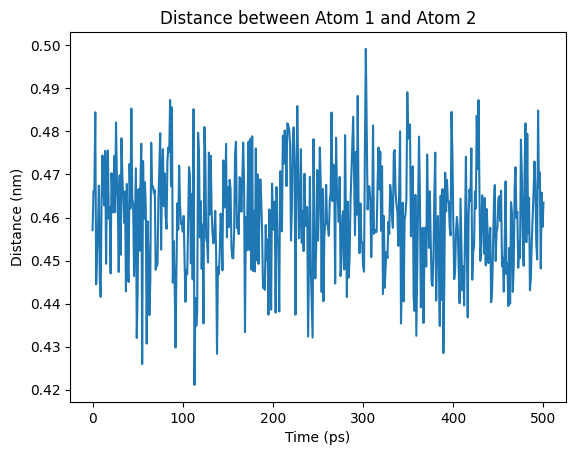

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mdtraj as md

# Load trajectory and topology
traj = md.load("02-pull/pull.xtc", top="02-pull/pull.gro")

# Select atoms or residues of interest
atom1_index = 0  # Index of the first atom
atom2_index = 10  # Index of the second atom

# Calculate distances
distances = md.compute_distances(traj, [[atom1_index, atom2_index]])

# Plot distances over time
plt.plot(traj.time, distances[:, 0])
plt.xlabel("Time (ps)")
plt.ylabel("Distance (nm)")
plt.title("Distance between Atom 1 and Atom 2")
plt.show()